In [1]:
import networkx as nx
import powerlaw as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter 

In [2]:
G = nx.read_edgelist('deezer.txt', create_using=nx.DiGraph, delimiter=',')

In [3]:
print(G)
# G.in_degree()

DiGraph with 27567 nodes and 92750 edges


In [4]:
def generate_ccdf_in(G):
   dd = Counter(dict(G.in_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")

   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   plt.ylim(bottom=0.0001)
   ax.set_title('IN-degree ccdf') 
   return None

In [5]:
def logscatter_in(G):
    d = dict(G.in_degree)
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log IN degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()
    return None

C:\Users\lilir\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


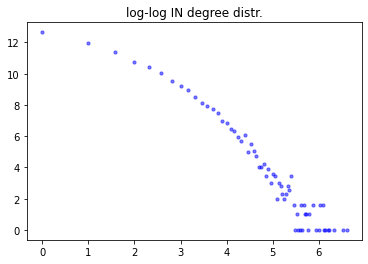

In [6]:
logscatter_in(G)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 11.0355 x ^ -1.3902 (k_min = 51)


C:\Users\lilir\AppData\Local\Temp\ipykernel_5764\1974784645.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


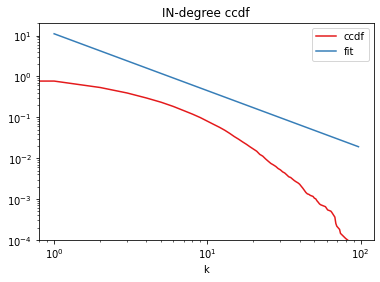

In [7]:
generate_ccdf_in(G)

In [8]:
def generate_ccdf_out(G):
   dd = Counter(dict(G.out_degree).values())
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   
   results = pl.Fit(ccdf["ccdf"])
   k_min = ccdf[ccdf["ccdf"] == results.power_law.xmin]["k"]
   print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))

   # Let's plot the best fit.
   ccdf["fit"] = (10 ** results.power_law.Kappa) * (ccdf["k"] ** -results.power_law.alpha)
   ax = plt.gca()
   ccdf.plot(kind = "line", x = "k", y = "ccdf", color = "#e41a1c", loglog = True, ax = ax)
   ccdf.plot(kind = "line", x = "k", y = "fit", color = "#377eb8", loglog = True, ax = ax)
   ax.set_title('OUT-degree ccdf') 
   plt.ylim(bottom=0.0001)
   return None

def logscatter_out(G):
    d = dict(G.out_degree())
    # turn into a count of degree (the values of the dict)
    counter = Counter(d.values())
    # Make it into a dataframe
    counter = pd.DataFrame(list(counter.items()), columns = ("k", "count")).sort_values(by = "k")
    plt.scatter(np.log2(counter['k']), np.log2(counter['count']), c = 'blue', s=10, alpha=0.5)
    plt.title("log-log OUT-degree distr.")
    plt.savefig("loglog_degree_distribution.png")
    plt.show()
    return None

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 11.1748 x ^ -1.3559 (k_min = 59)


C:\Users\lilir\AppData\Local\Temp\ipykernel_5764\3540730541.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


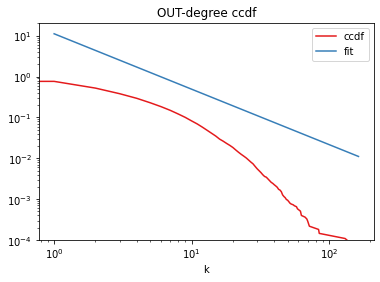

In [9]:
generate_ccdf_out(G)

C:\Users\lilir\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


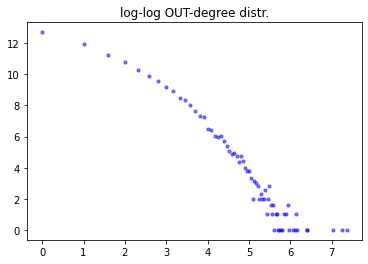

In [10]:
logscatter_out(G)

In [11]:
#Clustering coefficient
cc = nx.transitivity(G)
print(f"CC for real network: {cc}")

CC for real network: 0.04116244994833376


In [12]:
def p(Graph):
    return len(Graph.edges) / ((len(Graph.nodes) * (len(Graph.nodes)-1)) / 2)

print("The parameter p for the graph: ", p(G))

The parameter p for the graph:  0.00024410723747008144


In [13]:
#taking the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)

In [14]:
len(largest_scc)

8933

In [15]:
#edges of lscc
# strongs = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
# for strong in strongs:
#     G.subgraph(strong).edges()

In [16]:
#taking the largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)

In [17]:
len(largest_wcc)

27521

In [18]:
if largest_scc in largest_wcc:
    print(True)

In [19]:
largest_scc.issubset(largest_wcc)

True

- assortativity (**quantitative homophily**) - `-0.08324455771686787` ~ -0.08 - negative assortativity/disassortativity - nodes with high degrees tend to be connected to nodes with low degrees
- degree correlation - the extent to which nodes in a network tend to connect to nodes with a similar degree; got the same value as assortativity - `-0.08324455771686744`

In [20]:
ass = nx.degree_assortativity_coefficient(G)
ass 
#assortativity but as the val is negative -> disassortativity

0.02426893562583528

In [21]:
degkor = nx.degree_pearson_correlation_coefficient(G)
degkor #degree correlation

0.024268935625834334

closeness centrality - how close a node is to all other nodes in the network; calculated as the average of the shortest path length from the node to every other node in the network 

In [22]:
# clc = nx.closeness_centrality(G) 
# #dictionary of closeness centrality values

betweenness centrality - number of shortest paths in a graph that pass through a node divided by the number of shortest paths that exist between every pair of nodes in a graph

In [71]:
# bnc = nx.betweenness_centrality(G)
# #dictionary of betweenness centrality values

In [72]:
# clc
# print(bnc)

In [23]:
df = pd.read_csv('deezer_summary_lwcc.csv')
df

,Id,Label,indegree,outdegree,Degree,weighted indegree,weighted outdegree,Weighted Degree,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,componentnumber,strongcompnum,clustering,modularity_class
0,0,NaN,0,7,7,0,7,7,17,0.119722,0.126623,0.000000,0,9048,0.047619,0
1,1427,NaN,3,1,4,3,1,4,19,0.088968,0.092377,0.000509,0,555,0.000000,10
2,16976,NaN,6,5,11,6,5,11,16,0.118462,0.126453,0.000971,0,555,0.054545,10
3,12029,NaN,2,3,5,2,3,5,17,0.120498,0.129098,0.000039,0,555,0.200000,10
4,3001,NaN,2,2,4,2,2,4,19,0.099471,0.103055,0.000069,0,9047,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27560,27711,NaN,1,0,1,1,0,1,0,0.000000,0.000000,0.000000,21,18627,0.000000,0
27561,27790,NaN,0,1,1,0,1,1,1,1.000000,1.000000,0.000000,0,18629,0.000000,0
27562,27859,NaN,0,1,1,0,1,1,1,1.000000,1.000000,0.000000,0,18630,0.000000,0
27563,27950,NaN,0,1,1,0,1,1,18,0.098974,0.103025,0.000000,0,18631,0.000000,0


In [83]:
strongly_connected_components = max(nx.strongly_connected_components(G), key=len)
largest_strongly_connected_component = G.subgraph(strongly_connected_components).copy()

# Extract edges from the largest strongly connected component
edges_largest_component = list(largest_strongly_connected_component.edges())

largest_component_graph = nx.DiGraph(edges_largest_component)

# Plot the graph
# pos = nx.spring_layout(largest_component_graph)
# nx.draw(largest_component_graph, pos, with_labels=True, node_color='skyblue', node_size=500, font_weight='bold', arrows=True)
# plt.title("Graph of the Largest Strongly Connected Component")
# plt.show()


DiGraph with 8933 nodes and 35700 edges


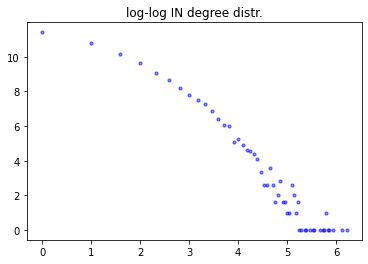

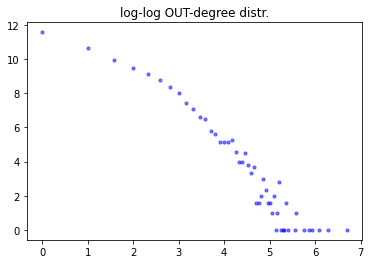

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 11.2001 x ^ -1.4341 (k_min = 37)


C:\Users\lilir\AppData\Local\Temp\ipykernel_6976\3540730541.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


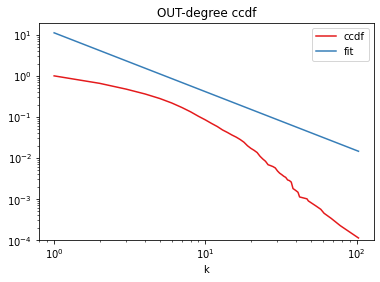

In [119]:
print(largest_component_graph)
logscatter_in(largest_component_graph)
logscatter_out(largest_component_graph)
generate_ccdf_out(largest_component_graph)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 11.0241 x ^ -1.4701 (k_min = 34)


C:\Users\lilir\AppData\Local\Temp\ipykernel_6976\1974784645.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


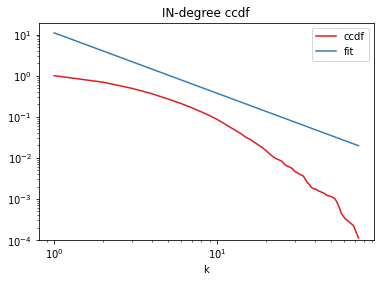

In [120]:
generate_ccdf_in(largest_component_graph)

DiGraph with 27567 nodes and 92750 edges


C:\Users\lilir\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


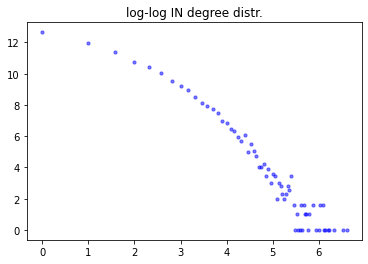

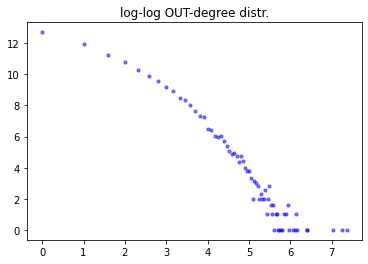

Calculating best minimal value for power law fit

C:\Users\lilir\AppData\Local\Temp\ipykernel_6976\3540730541.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))



Powerlaw CCDF Fit: 11.1748 x ^ -1.3559 (k_min = 59)


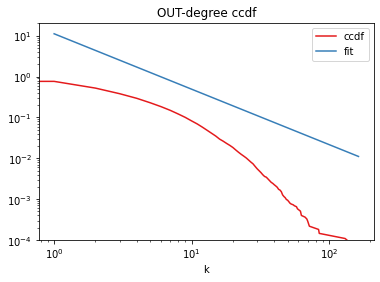

In [121]:
print(G)
logscatter_in(G)
logscatter_out(G)
generate_ccdf_out(G)

Calculating best minimal value for power law fit
Powerlaw CCDF Fit: 11.0355 x ^ -1.3902 (k_min = 51)


C:\Users\lilir\AppData\Local\Temp\ipykernel_6976\1974784645.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print("Powerlaw CCDF Fit: %1.4f x ^ -%1.4f (k_min = %d)" % (10 ** results.power_law.Kappa, results.power_law.alpha, k_min))


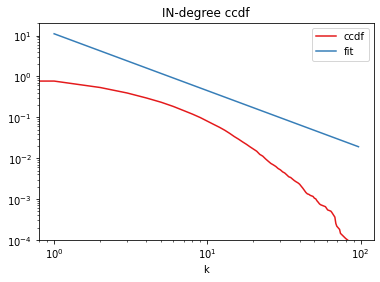

In [122]:
generate_ccdf_in(G)